# Model Building and Graphing

This file shall be used as a testbed for the linear mixed effects model as well as graphing the results

In [1]:
import pandas as pd
from _functions import get_relative_path

data = pd.read_csv(get_relative_path() / "comments.csv")
transcripts = pd.read_csv(get_relative_path() / "transcripts.csv")

transcripts.head()

c:\Users\Trevo\OneDrive\Documents\GitHub\NLP-Midterm\Code\_functions.py:14: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Trevo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Trevo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,index,source,transcript,sentiment
0,1,bbc_news,We begin with the breaking news. A fresh trade...,"{'compound': -0.8748, 'positive': 0.087, 'neut..."
1,2,bbc_news,There are growing fears of a major global trad...,"{'compound': 0.825, 'positive': 0.095, 'neutra..."
2,3,bbc_news,I'm Helena Humphrey. Good to have you with us....,"{'compound': 0.9803, 'positive': 0.092, 'neutr..."
3,1,bloomberg,"Congratulations, Mr.\n\nWell, he's back and gu...","{'compound': -0.9962, 'positive': 0.076, 'neut..."
4,3,bloomberg,We are continuing to get headlines out of the ...,"{'compound': 0.9854, 'positive': 0.067, 'neutr..."


In [2]:
# DONE : Create a dummy one-hot encoding for the source
dummies = pd.get_dummies(data["source"], prefix="source", drop_first=True)
dummies = dummies.astype(int)
dummies_list = dummies.columns.tolist()

# Concat the one-hot dummy variables to the original data
data = pd.concat([data, dummies], axis=1)

# DONE : Convert Sarcasm to a binary variable
# data["sarcasm"] = data["sarcasm"].map({"Sarcastic": 1, "Not Sarcastic": 0})

# TODO : Join the transcripts sentiment column to the data using the source and index as key
data = pd.merge(
    data,
    transcripts[["source", "index", "sentiment"]],
    how="left",
    left_on=["source", "index"],
    right_on=["source", "index"],
)

data['negative_transcript'] = data['sentiment'].apply(lambda row: eval(row)['negative'])
data['neutral_transcript'] = data['sentiment'].apply(lambda row: eval(row)['neutral'])
data['positive_transcript'] = data['sentiment'].apply(lambda row: eval(row)['positive'])
data['compound_transcript'] = data['sentiment'].apply(lambda row: eval(row)['compound'])
data = data.drop(columns=["sentiment"])

data['negative_comment'] = data['vader_comment'].apply(lambda row: eval(row)['negative'])
data['neutral_comment'] = data['vader_comment'].apply(lambda row: eval(row)['neutral'])
data['positive_comment'] = data['vader_comment'].apply(lambda row: eval(row)['positive'])
data['compound_comment'] = data['vader_comment'].apply(lambda row: eval(row)['compound'])

data.head()

,index,source,leaning,reliability_score,bias_score,vader_transcript,vader_comment,comment,clean_comment,sarcasm,...,source_sky_news,source_wsj,negative_transcript,neutral_transcript,positive_transcript,compound_transcript,negative_comment,neutral_comment,positive_comment,compound_comment
0,1,bbc_news,Center,44.73,-1.33,NaN,"{'compound': 0.3182, 'positive': 0.187, 'neutr...","You tariff me, I tariff you. It seems fair to ...","you tariff me, i tariff you. it seems fair to me.",Not Sarcastic,...,0,0,0.088,0.825,0.087,-0.8748,0.000,0.813,0.187,0.3182
1,1,bbc_news,Center,44.73,-1.33,NaN,"{'compound': 0.0, 'positive': 0.0, 'neutral': ...",Wonder how Trump administration is going to be...,wonder how trump administration is going to be...,Not Sarcastic,...,0,0,0.088,0.825,0.087,-0.8748,0.000,1.000,0.000,0.0000
2,1,bbc_news,Center,44.73,-1.33,NaN,"{'compound': -0.7131, 'positive': 0.066, 'neut...","if Fentanyl enter US through Canada, why don't...","if fentanyl enter us through canada, why don't...",Sarcastic,...,0,0,0.088,0.825,0.087,-0.8748,0.196,0.738,0.066,-0.7131
3,1,bbc_news,Center,44.73,-1.33,NaN,"{'compound': 0.296, 'positive': 0.098, 'neutra...","So trump said he’d tariff Canada, Canada threa...","so trump said he’d tariff canada, canada threa...",Sarcastic,...,0,0,0.088,0.825,0.087,-0.8748,0.056,0.846,0.098,0.2960
4,1,bbc_news,Center,44.73,-1.33,NaN,"{'compound': -0.6597, 'positive': 0.0, 'neutra...",America needs to stop blaming other countries ...,america needs to stop blaming other countries ...,Sarcastic,...,0,0,0.088,0.825,0.087,-0.8748,0.435,0.565,0.000,-0.6597


In [3]:
ols_betas = dummies_list + ['negative_transcript']
ols_betas

['source_bloomberg',
 'source_cnn',
 'source_forbes',
 'source_fox_news',
 'source_nbc_news',
 'source_sixty_minutes',
 'source_sky_news',
 'source_wsj',
 'negative_transcript']

In [4]:
import statsmodels.api as sm

# TODO : Create ols model
model = sm.OLS(data['negative_comment'], sm.add_constant(data[ols_betas]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       negative_comment   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.150
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           1.13e-08
Time:                        14:14:40   Log-Likelihood:                 4418.1
No. Observations:                7542   AIC:                            -8816.
Df Residuals:                    7532   BIC:                            -8747.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0988 

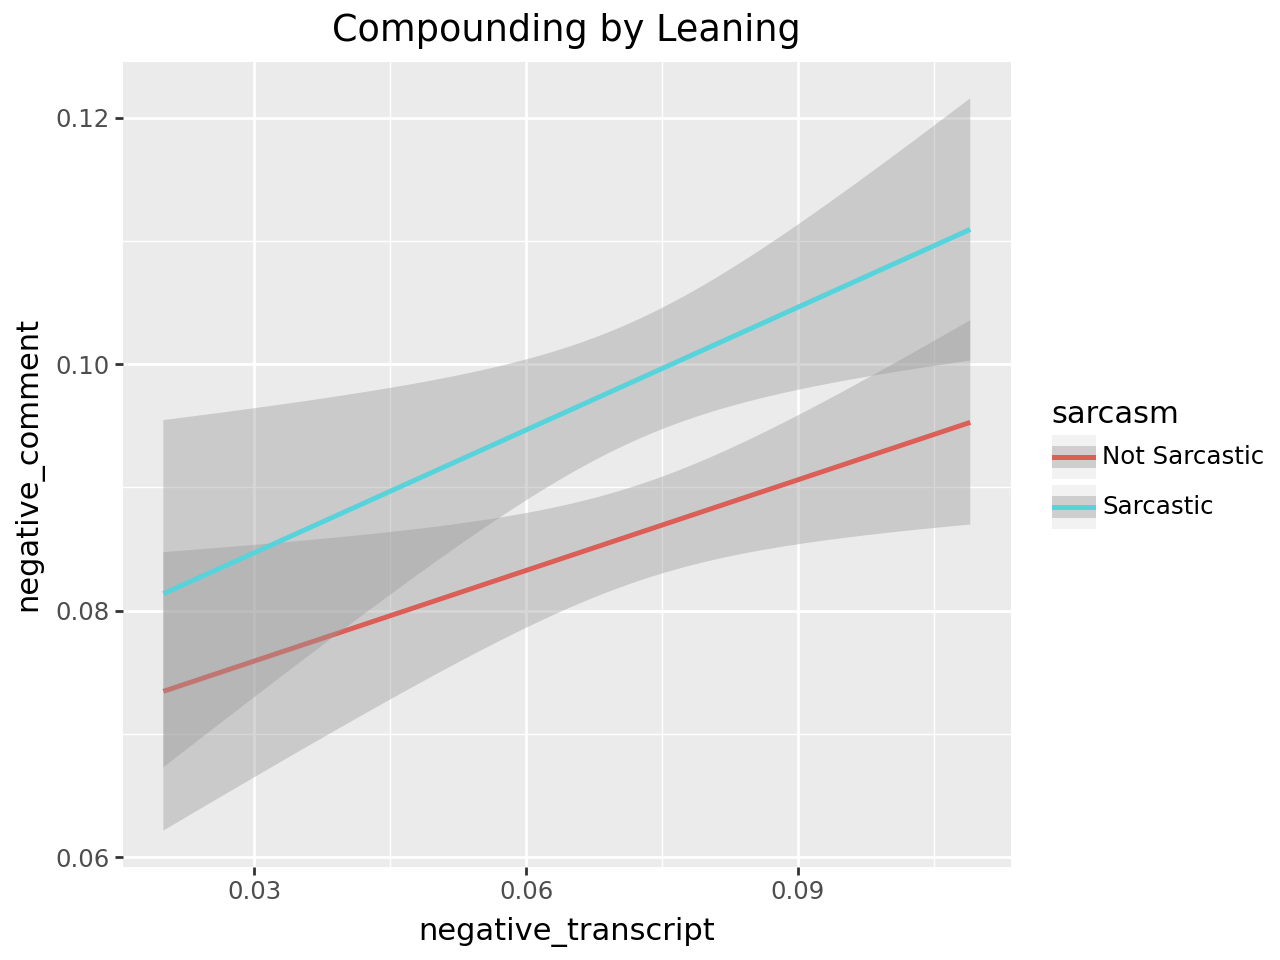

In [30]:
from plotnine import *


(ggplot(data, aes(x='negative_transcript', y='negative_comment', color='sarcasm')) +
 ggtitle("Compounding by Leaning") +
 geom_smooth(method='lm', se=True))